# Model Training

## 1.1 Import Data and Required Packages

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset

df=pd.read_csv("Cleaned_Car_Data.csv")
df.head()

,Unnamed: 0,name,company,year,price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [3]:
print("Categories in 'company' variable:     ",end=" " )
print(df['company'].unique())

print("Categories in 'fuel_type' variable:     ",end=" " )
print(df['fuel_type'].unique())

Categories in 'company' variable:      ['Hyundai' 'Mahindra' 'Ford' 'Maruti' 'Skoda' 'Audi' 'Toyota' 'Renault'
 'Honda' 'Datsun' 'Mitsubishi' 'Tata' 'Volkswagen' 'Chevrolet' 'Mini'
 'BMW' 'Nissan' 'Hindustan' 'Fiat' 'Force' 'Mercedes' 'Land' 'Jaguar'
 'Jeep' 'Volvo']
Categories in 'fuel_type' variable:      ['Petrol' 'Diesel' 'LPG']


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

### Preparing X and y variables

In [7]:
X=df.drop("price",axis=1)
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [8]:
y=df["price"]
y.head()

0     80000
1    425000
2    325000
3    575000
4    175000
Name: price, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X=preprocessor.fit_transform(X)

In [11]:
X.shape

(816, 284)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape, X_test.shape

((652, 284), (164, 284))

In [13]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2score=r2_score(true,predicted)
    return mae, mse, rmse, r2score

In [14]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "SVR":SVR(),
    "XGBRegressor":XGBRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # Training model

    # Make Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Evaluate train and test datasets
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2score=evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2score=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2score))
    r2_list.append(model_test_r2score)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 268517.5296
- Mean Absolute Error: 67610.5922
- R2 Score: 0.7069
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 197676.2577
- Mean Absolute Error: 101356.9563
- R2 Score: 0.7282


Ridge
Model performance for Training set
- Root Mean Squared Error: 285792.9861
- Mean Absolute Error: 95971.7055
- R2 Score: 0.6679
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 203987.4890
- Mean Absolute Error: 114950.7493
- R2 Score: 0.7105


Lasso
Model performance for Training set
- Root Mean Squared Error: 268517.7179
- Mean Absolute Error: 67731.6503
- R2 Score: 0.7069
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 239684.1328
- Mean Absolute Error: 99674.7184
- R2 Score: 0.6003


DecisionTreeRegressor
Model performance for Training set
- Root Mean Squared Error: 4968.6677
- Mean Absolut

## Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,LinearRegression,0.728156
1,Ridge,0.710520
5,RandomForestRegressor,0.686935
8,XGBRegressor,0.608946
2,Lasso,0.600341
4,KNeighborsRegressor,0.583064
3,DecisionTreeRegressor,0.480493
6,AdaBoostRegressor,0.086977
7,SVR,-0.057711


In [16]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [19]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %r2)

 Accuracy of the model is 91.99


## Plotting y_test and y_pred

Text(0, 0.5, 'Predicted')

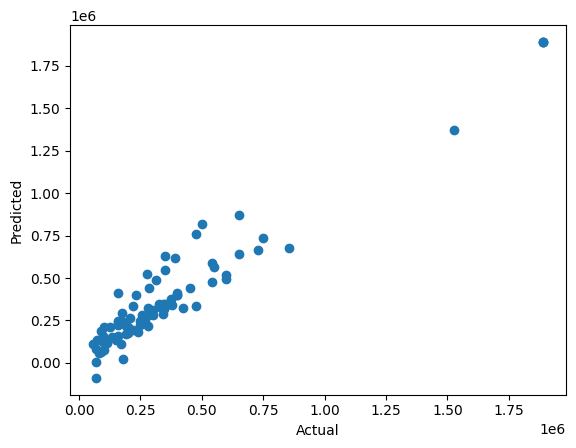

In [20]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='price'>

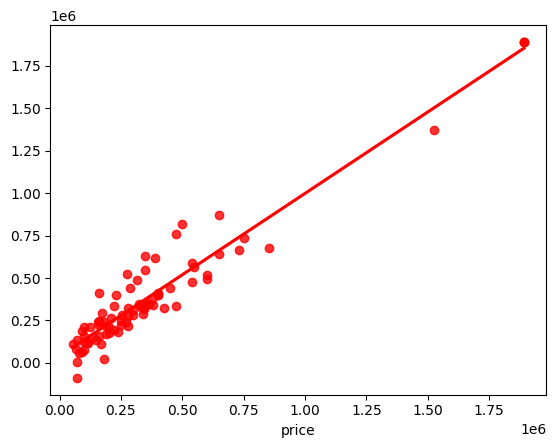

In [21]:
sns.regplot(x=y_test,y=y_pred,color="red",ci=None)

## Difference between actual and predicted

In [22]:
pred_df=pd.DataFrame({"actual_value":y_test,"predicted_value":y_pred,"difference":y_test-y_pred})
pred_df

,actual_value,predicted_value,difference
593,300000,3.088074e+05,-8807.372682
588,855000,6.773320e+05,177667.992228
155,159500,2.456994e+05,-86199.420283
248,255000,2.819764e+05,-26976.376469
260,1891111,1.890986e+06,125.014186
...,...,...,...
783,475000,7.578262e+05,-282826.239342
319,199999,2.120981e+05,-12099.102343
217,80000,5.817286e+04,21827.136180
786,100000,7.396597e+04,26034.028174
